In [22]:
#!conda install scikit-learn -y

In [23]:
import numpy as np
from sklearn.svm import SVR
from n_dimensional_datasets import *
from plotter import *

In [24]:
start = -1
stop = 1
n_samples = 1000

## 1D

mean error: 0.012728152219706416, mean score: 0.9325920797453424


errors: [-0.012020262627972638, -0.016231556480548817, -0.015289080772359154, -0.01420238142047104, -0.018885422866948748, -0.014057720832084519, -0.009094663948637461, -0.014998788511772122, -0.007174563321756324, -0.005327081414513332]

score: [0.9290446936877983, 0.937302808774217, 0.9306577733389737, 0.9315833432140385, 0.9287515676420636, 0.9356110985998223, 0.9324730095918342, 0.933385425514406, 0.9337295451651697, 0.9333815319251009]


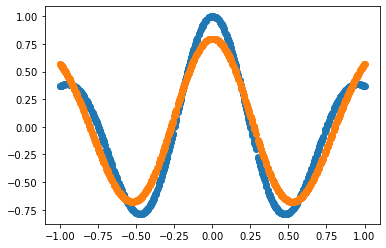

In [25]:
n_features = 1

stats = {"score": [], "error": []}
score = []
best = None

seeds = range(10)
for seed in seeds:
    X = stochastic_mesh(n_features, start, stop, n_samples).T
    y = decaying_sinewave_nd(X.T)
    clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
    clf.fit(X, y)
    score = clf.score(X, y)
    stats["error"].append(np.mean(clf.predict(X)-y))
    stats["score"].append(score)
    if best is None or np.any(score > stats["score"]):
        best = clf
print("mean error: {}, mean score: {}\n\n".format(np.mean(np.abs(stats["error"])), np.mean(np.abs(stats["score"]))))
print("errors: {}\n\nscore: {}".format(stats["error"], stats["score"]))

import matplotlib.pyplot as plt
if X.shape[1] == 1:
    plt.plot(X, y, 'o')
    plt.plot(X, best.predict(X), 'o')

## ND

In [27]:
n_features = 100

stats = {"score": [], "error": []}
score = []
best = None

seeds = range(10)
for seed in seeds:
    X = stochastic_mesh(n_features, start, stop, n_samples, seed=seed).T
    y = decaying_sinewave_nd(X.T)
    clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
    clf.fit(X, y)
    score = clf.score(X, y)
    stats["error"].append(np.mean(clf.predict(X)-y))
    stats["score"].append(score)
    if best is None or np.any(score > stats["score"]):
        best = clf
print("mean error: {}, mean score: {}\n\n".format(np.mean(np.abs(stats["error"])), np.mean(np.abs(stats["score"]))))
print("errors: {}\n\nscore: {}".format(stats["error"], stats["score"]))

if X.shape[1] == 2:
    plot3d_approximation(X.T, y.T.reshape(-1), best.predict(X).reshape(-1))

mean error: 3.355451008869968e-35, mean score: 0.0009921623381116795


errors: [2.167989035628793e-35, -4.1980383331904833e-35, 5.2952501041350475e-37, 3.5271861803506503e-37, -1.1402376561669463e-35, 2.0475999394304675e-38, 1.0888528055591022e-36, 1.9426592345663669e-35, 2.368038898255145e-34, -2.260396032554407e-36]

score: [-0.0008314570762559814, -0.0012266464453654091, -0.00041611343573433324, -0.001997762642395484, -0.0019479740700976134, -2.7608810344581514e-06, -0.00034863082837977005, -0.001048296620908662, -0.0010111672235593172, -0.0010908141573857666]
